In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os

In [3]:
print(os.listdir("/gdrive/My Drive/Goz_Hastaliklari/Glaucoma-Normal"))

['Glaucoma', 'Normal']


In [4]:
DATADIR = "/gdrive/My Drive/Goz_Hastaliklari/Glaucoma-Normal"

CATEGORIES = ["Glaucoma","Normal"]

In [5]:
IMG_SIZE = 50

In [6]:
all_data = []

def create_all_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                all_data.append([new_array, class_num])
            except Exception as e:
                pass

create_all_data()

In [7]:
print("Toplam Görüntü Sayısı: ", len(all_data))

Toplam Görüntü Sayısı:  2081


In [8]:
X = []
y = []

for categories, label in all_data:
  X.append(categories)
  y.append(label)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)


In [10]:
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

x_val = np.array(x_val)
y_val = np.array(y_val)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(1216, 50, 50, 3)
(729, 50, 50, 3)
(136, 50, 50, 3)
(1216,)
(729,)
(136,)


In [12]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

In [13]:
import tensorflow as tf

train_yCl = tf.keras.utils.to_categorical(y_train, num_classes=2)
test_yCl = tf.keras.utils.to_categorical(y_test, num_classes=2)
valid_yCl = tf.keras.utils.to_categorical(y_val, num_classes=2)

In [14]:
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

In [15]:
res = tf.keras.applications.ResNet50V2(
    input_shape=(50, 50, 3),
    include_top = False
)

94668760/94668760 [==============================] - 0s 0us/step


In [16]:
res_model = Sequential()
res_model.add(res)
res_model.add(Dropout(0.25))
res_model.add(MaxPooling2D())
res_model.add(Flatten())
res_model.add(Dense(256, activation='relu'))
res_model.add(BatchNormalization())
res_model.add(Dropout(0.5))
res_model.add(Dense(2, activation='softmax'))

In [17]:
res_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = res_model.fit(x_train, train_yCl,
                        batch_size=120,
                        epochs=10,
                        validation_data=(x_val, valid_yCl))

Epoch 1/10
11/11 [==============================] - 50s 556ms/step - loss: 1.0263 - accuracy: 0.6102 - val_loss: 63.4021 - val_accuracy: 0.4779
Epoch 2/10
11/11 [==============================] - 1s 106ms/step - loss: 0.7016 - accuracy: 0.6579 - val_loss: 953.6140 - val_accuracy: 0.5221
Epoch 3/10
11/11 [==============================] - 1s 105ms/step - loss: 0.6316 - accuracy: 0.6859 - val_loss: 2637.9949 - val_accuracy: 0.4779
Epoch 4/10
11/11 [==============================] - 1s 105ms/step - loss: 0.5433 - accuracy: 0.7212 - val_loss: 92.1078 - val_accuracy: 0.5441
Epoch 5/10
11/11 [==============================] - 1s 107ms/step - loss: 0.5800 - accuracy: 0.7138 - val_loss: 146.5182 - val_accuracy: 0.5441
Epoch 6/10
11/11 [==============================] - 1s 111ms/step - loss: 0.5008 - accuracy: 0.7492 - val_loss: 49.3712 - val_accuracy: 0.5956
Epoch 7/10
11/11 [==============================] - 1s 109ms/step - loss: 0.4976 - accuracy: 0.7689 - val_loss: 72.7121 - val_accuracy: 0

In [19]:
score_valid = res_model.evaluate(x_val, valid_yCl)
print("Validation Accuracy: ", score_valid[1])

score_test = res_model.evaluate(x_test, test_yCl)
print("Test Accuracy: ", score_test[1])

score_train = res_model.evaluate(x_train, train_yCl)
print("Train Accuracy: ", score_train[1])

5/5 [==============================] - 2s 217ms/step - loss: 19.4789 - accuracy: 0.5294
Validation Accuracy:  0.529411792755127
23/23 [==============================] - 1s 57ms/step - loss: 25.0317 - accuracy: 0.4829
Test Accuracy:  0.4828532338142395
38/38 [==============================] - 1s 14ms/step - loss: 24.2477 - accuracy: 0.4778
Train Accuracy:  0.4777960479259491


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Test verisi üzerinde tahminlerde bulunun
y_pred_probs = res_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Gerçek sınıfları alın
y_true_classes = np.argmax(test_yCl, axis=1)

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print(f"F1-Score: {f1}")

# Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

23/23 [==============================] - 1s 12ms/step
Accuracy: 0.4828532235939643
Precision: 0.4324130497949144
Recall: 0.4828532235939643
F1-Score: 0.34512806378942185
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.95      0.64       359
           1       0.38      0.03      0.06       370

    accuracy                           0.48       729
   macro avg       0.43      0.49      0.35       729
weighted avg       0.43      0.48      0.35       729

Confusion Matrix:
[[341  18]
 [359  11]]


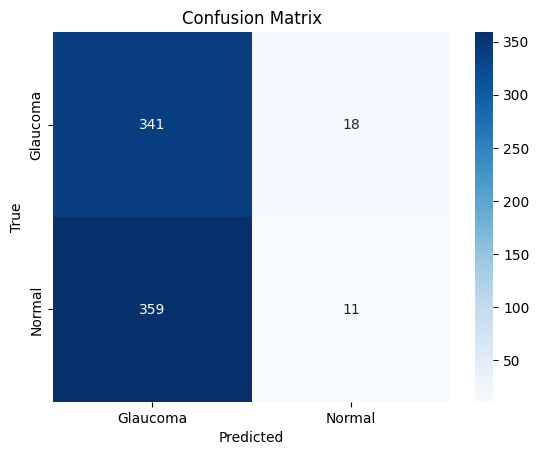

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)


In [23]:
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

x_val = np.array(x_val)
y_val = np.array(y_val)


In [24]:

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(1497, 50, 50, 3)
(417, 50, 50, 3)
(167, 50, 50, 3)
(1497,)
(417,)
(167,)


In [25]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

In [26]:

import tensorflow as tf

train_yCl = tf.keras.utils.to_categorical(y_train, num_classes=2)
test_yCl = tf.keras.utils.to_categorical(y_test, num_classes=2)
valid_yCl = tf.keras.utils.to_categorical(y_val, num_classes=2)

In [27]:

from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

In [28]:

res = tf.keras.applications.ResNet50V2(
    input_shape=(50, 50, 3),
    include_top = False
)

In [29]:
res_model = Sequential()
res_model.add(res)
res_model.add(Dropout(0.25))
res_model.add(MaxPooling2D())
res_model.add(Flatten())
res_model.add(Dense(256, activation='relu'))
res_model.add(BatchNormalization())
res_model.add(Dropout(0.5))
res_model.add(Dense(2, activation='softmax'))

In [30]:
res_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [31]:
history = res_model.fit(x_train, train_yCl,
                        batch_size=120,
                        epochs=10,
                        validation_data=(x_val, valid_yCl))

Epoch 1/10
13/13 [==============================] - 32s 380ms/step - loss: 0.9269 - accuracy: 0.6373 - val_loss: 55.9560 - val_accuracy: 0.5210
Epoch 2/10
13/13 [==============================] - 1s 108ms/step - loss: 0.7449 - accuracy: 0.6660 - val_loss: 261.7612 - val_accuracy: 0.5210
Epoch 3/10
13/13 [==============================] - 1s 108ms/step - loss: 0.5540 - accuracy: 0.7381 - val_loss: 386.6068 - val_accuracy: 0.5210
Epoch 4/10
13/13 [==============================] - 1s 110ms/step - loss: 0.4143 - accuracy: 0.8163 - val_loss: 295.8141 - val_accuracy: 0.5210
Epoch 5/10
13/13 [==============================] - 1s 112ms/step - loss: 0.4370 - accuracy: 0.8183 - val_loss: 70.6034 - val_accuracy: 0.5210
Epoch 6/10
13/13 [==============================] - 1s 110ms/step - loss: 0.4574 - accuracy: 0.8136 - val_loss: 24.1195 - val_accuracy: 0.4790
Epoch 7/10
13/13 [==============================] - 1s 109ms/step - loss: 0.2982 - accuracy: 0.8764 - val_loss: 1.3066 - val_accuracy: 0.6

In [32]:
score_valid = res_model.evaluate(x_val, valid_yCl)
print("Validation Accuracy: ", score_valid[1])

score_test = res_model.evaluate(x_test, test_yCl)
print("Test Accuracy: ", score_test[1])

score_train = res_model.evaluate(x_train, train_yCl)
print("Train Accuracy: ", score_train[1])


6/6 [==============================] - 1s 200ms/step - loss: 1.5492 - accuracy: 0.7725
Validation Accuracy:  0.772455096244812
14/14 [==============================] - 1s 70ms/step - loss: 1.1190 - accuracy: 0.8321
Test Accuracy:  0.8321343064308167
47/47 [==============================] - 1s 14ms/step - loss: 0.7078 - accuracy: 0.8677
Train Accuracy:  0.8677354454994202


In [33]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Test verisi üzerinde tahminlerde bulunun
y_pred_probs = res_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Gerçek sınıfları alın
y_true_classes = np.argmax(test_yCl, axis=1)

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print(f"F1-Score: {f1}")

# Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

14/14 [==============================] - 2s 21ms/step
Accuracy: 0.8321342925659473
Precision: 0.8521672617809721
Recall: 0.8321342925659473
F1-Score: 0.8295340814091771
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       207
           1       0.77      0.95      0.85       210

    accuracy                           0.83       417
   macro avg       0.85      0.83      0.83       417
weighted avg       0.85      0.83      0.83       417

Confusion Matrix:
[[147  60]
 [ 10 200]]


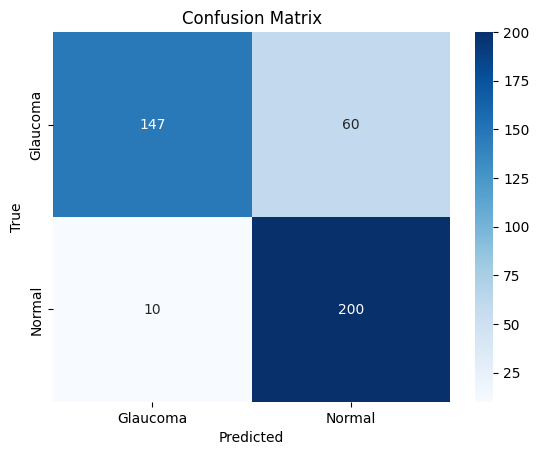

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()